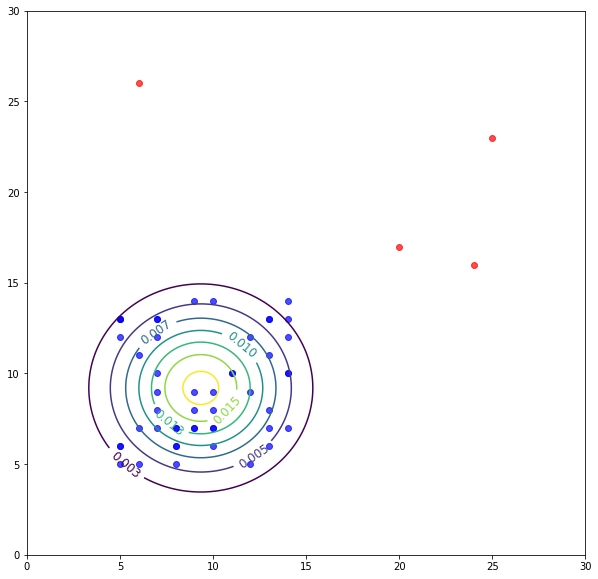

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack((
    np.random.randint(5, 15, (50, 2)),
    np.random.randint(5, 30, (4, 2)),
))

# split into train and test
X_train = X[:50]
X_test = X[50:]

# density estimation
mu = 1/X_train.shape[0] * np.sum(X_train, axis=0) 
sigma_squared = 1/X_train.shape[0] * np.sum((X_train - mu) ** 2, axis=0)

# probability calculation for test
def p(x, mu, sigma_squared):
    return np.prod(1 / np.sqrt(2*np.pi*sigma_squared) * np.exp(-(x-mu)**2/(2*sigma_squared)), axis=1)

p_test = p(X_test, mu, sigma_squared)

# visualization using contour plot
delta = 0.025
x = np.arange(0, 30, delta)
y = np.arange(0, 30, delta)
x, y = np.meshgrid(x, y)
z = p(np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))), mu, sigma_squared).reshape(x.shape)

plt.figure(figsize=(10, 10))
CS = plt.contour(x, y, z)
plt.clabel(CS, inline=1, fontsize=12)
plt.scatter(X[:50, 0], X[:50, 1], c='b', alpha=0.7)
plt.scatter(X[50:, 0], X[50:, 1], c='r', alpha=0.7)

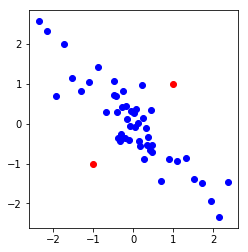

In [2]:
X = np.zeros((50, 2))
X[:10, 0] = np.linspace(0, 20, 10)
X[10:40, 0] = np.linspace(20, 30, 30)
X[40:, 0] = np.linspace(30, 50, 10)
X[:, 1] = -3 * X[:, 0] + 20 * np.random.randn(50,)
X_test = np.array([
    [10., -100.],
    [40., -40.]
])

def normalize(X):
    X_mean = X.mean(axis=0)
    X_std_dev = X.std(axis=0)
    return (X-X_mean)/X_std_dev

X = normalize(X)
X_test = normalize(X_test)

plt.scatter(X[:, 0], X[:, 1], c='b')
plt.scatter(X_test[:, 0], X_test[:, 1], c='r')
plt.axis('scaled')
plt.show()

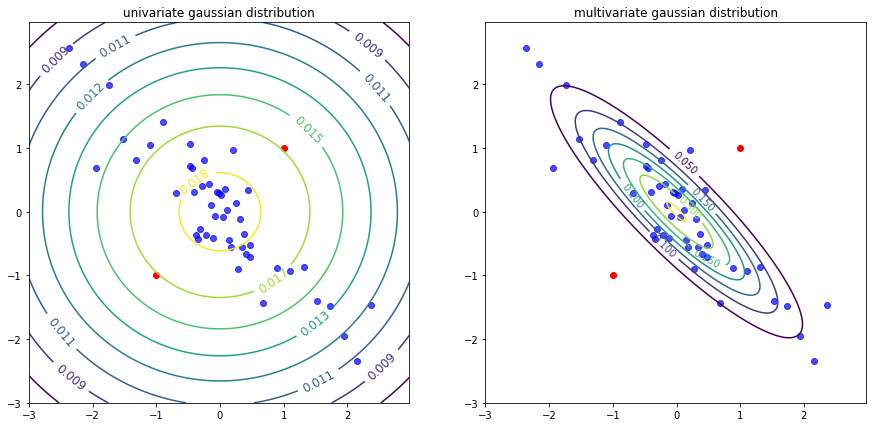

In [4]:
mu = X.mean(axis=0)
sigma = X.std(axis=0)
p(X_test, mu, sigma)

mu_mv = 1/X.shape[0] * np.sum(X, axis=0) 
sigma_mv = 1/X.shape[0] * np.matmul((X - mu_mv).transpose(), (X-mu_mv))

def p_mv(x, mu, sigma):
    res = []
    for x_i in x:
        res.append(1 / (2 * np.pi ** (x.shape[1]/2)) / np.sqrt(np.linalg.det(sigma_mv)) *np.exp(-0.5 * np.dot(x_i-mu, np.dot(np.linalg.pinv(sigma), (x_i-mu).transpose()))))
    return np.array(res)

p_mv(X_test, mu_mv, sigma_mv)

plt.figure(figsize=(15, 7))

delta = 0.025
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
x, y = np.meshgrid(x, y)
z = p(np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))), mu, sigma_squared).reshape(x.shape)

plt.subplot(1, 2, 1)
CS = plt.contour(x, y, z)
plt.clabel(CS, inline=1, fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c='b', alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c='r')
plt.axis('scaled')
plt.title('univariate gaussian distribution')

delta = 0.025
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
x, y = np.meshgrid(x, y)
z = p_mv(np.hstack((x.reshape(-1, 1), y.reshape(-1, 1))), mu_mv, sigma_mv).reshape(x.shape)

plt.subplot(1, 2, 2)
CS = plt.contour(x, y, z)
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(X[:, 0], X[:, 1], c='b', alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c='r')
plt.axis('scaled')
plt.title('multivariate gaussian distribution')
plt.show()